In [1]:
import pandas as pd #data processing
import numpy as np  #linear algebra

In [2]:
# Load Dataset
df = pd.read_csv("drugsComTrain_raw.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import plotly as px
plt.style.use('fivethirtyeight')

In [5]:
#preview Dataset
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
df['condition'].nunique()

884

In [7]:
# Columns
df.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [8]:
df['condition'].nunique()

884

In [9]:
# Missing Values
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [10]:
df.shape

(161297, 7)

In [11]:
df = df.dropna()

In [12]:
df.shape

(160398, 7)

####Observation :
+ Most of the missing values are in the condition column

+ This implies that most people don't know their condition by name or privacy

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.8+ MB


In [14]:
df.describe()

,uniqueID,rating,usefulCount
count,160398.000000,160398.000000,160398.000000
mean,115957.147309,6.995923,28.097613
std,67015.899492,3.272303,36.457876
min,2.000000,1.000000,0.000000
25%,58065.250000,5.000000,6.000000
50%,115845.500000,8.000000,16.000000
75%,173826.750000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


##EDA and Data Visualization

In [15]:
#Number of Conditions
df.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

 ##Observation
 +  We have 884 different conditions

In [16]:
df['condition'].value_counts().nlargest(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

<AxesSubplot: >

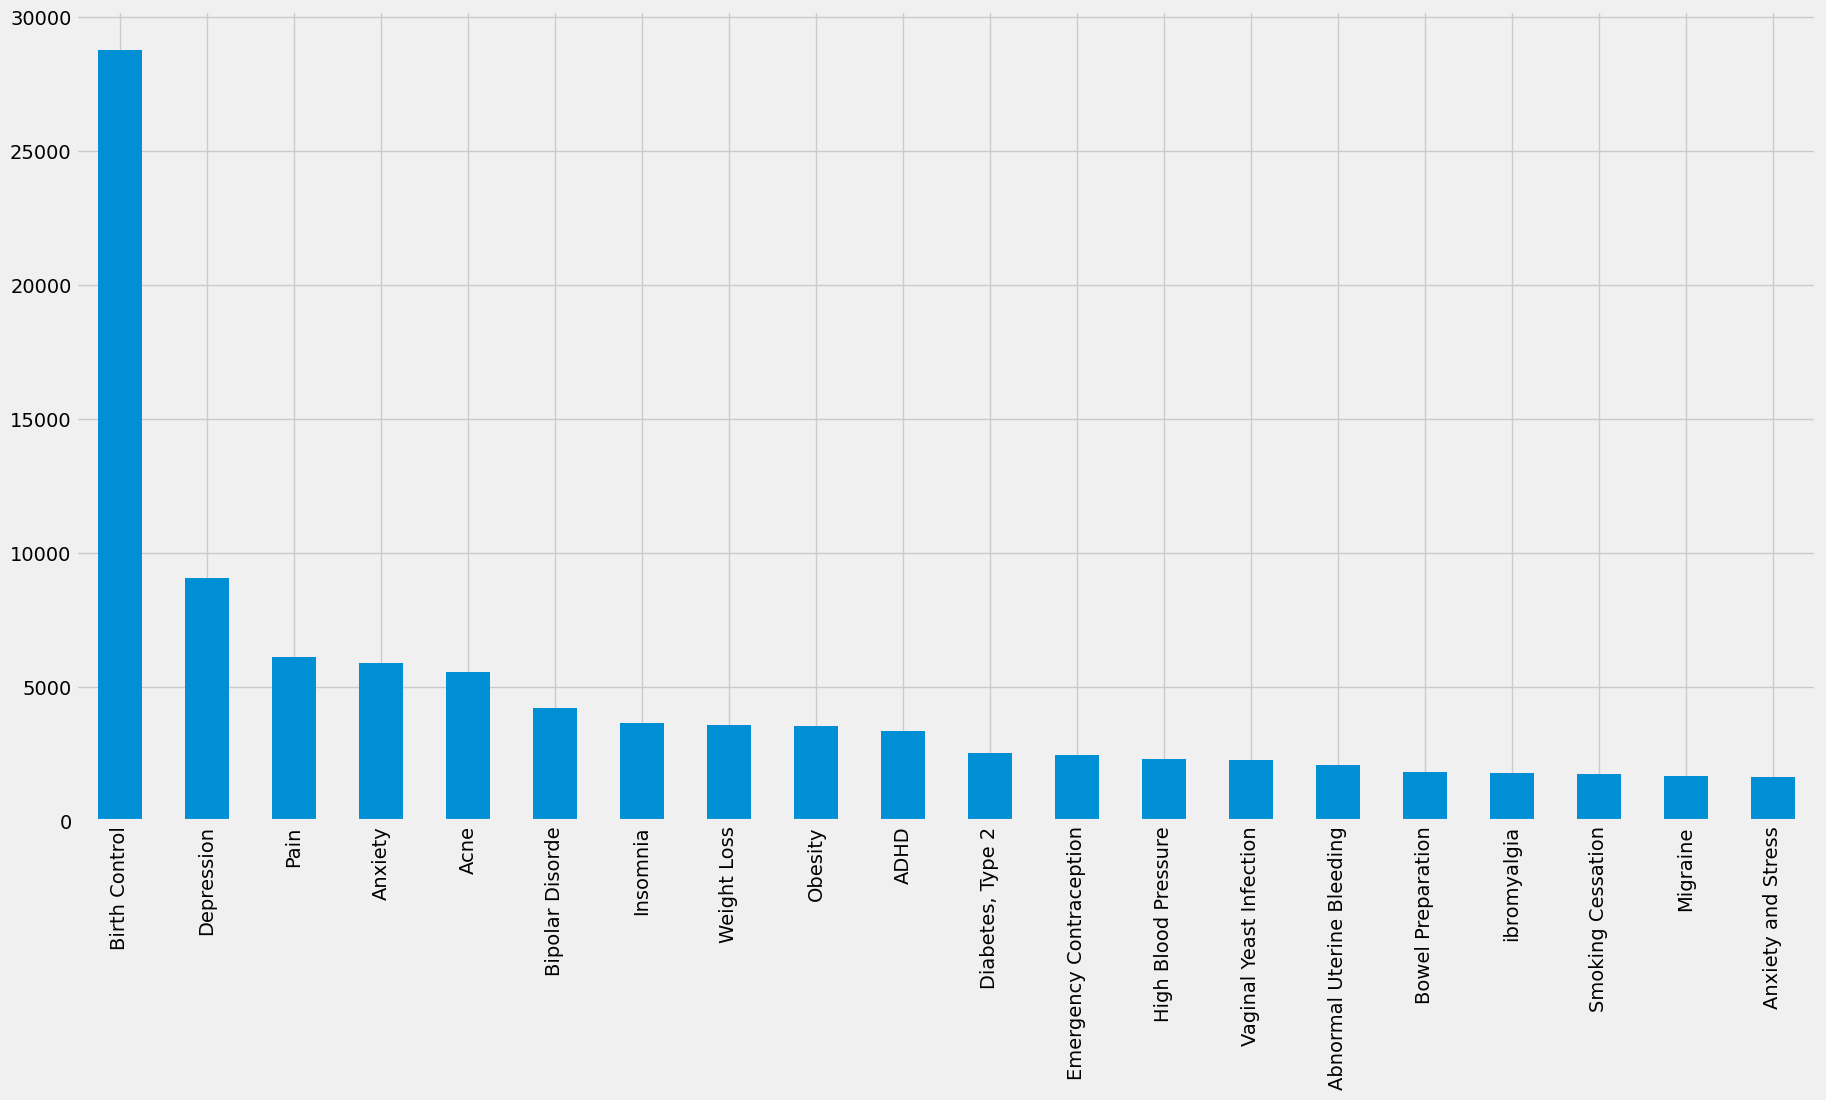

In [17]:
#most commonest conditions
df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

  ##Observation
 +  The most commonest condition is Birth Control,followed by Depression and pain and Anxiety 


In [18]:
df.drop(['uniqueID', 'date'],axis =1,inplace=True)

In [19]:
#How many Drugs per condition
df.groupby('condition')['drugName'].nunique()


condition
0</span> users found this comment helpful.      42
10</span> users found this comment helpful.     28
110</span> users found this comment helpful.     1
11</span> users found this comment helpful.     10
121</span> users found this comment helpful.     1
                                                ..
unctional Gastric Disorde                        1
ungal Infection Prophylaxis                      1
ungal Pneumonia                                  1
von Willebrand's Disease                         3
zen Shoulde                                      8
Name: drugName, Length: 884, dtype: int64

In [20]:
# How many drugs do we have?
num = len(df['drugName'].unique().tolist())
print('number of Drugs are -',num )

number of Drugs are - 3431


In [21]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Phentermine                           1538
Sertraline                            1353
Escitalopram                          1287
Mirena                                1242
Implanon                              1102
Gabapentin                            1042
Bupropion                             1017
Venlafaxine                           1012
Miconazole                             998
Citalopram                             994
Medroxyprogesterone                    971
Lexapro                                952
Bupropion / naltrexone                 945
Duloxetine                             931
Name: drugName, dtype: int64

Text(0.5, 1.0, 'Top 20 Most popular drugs based on counts')

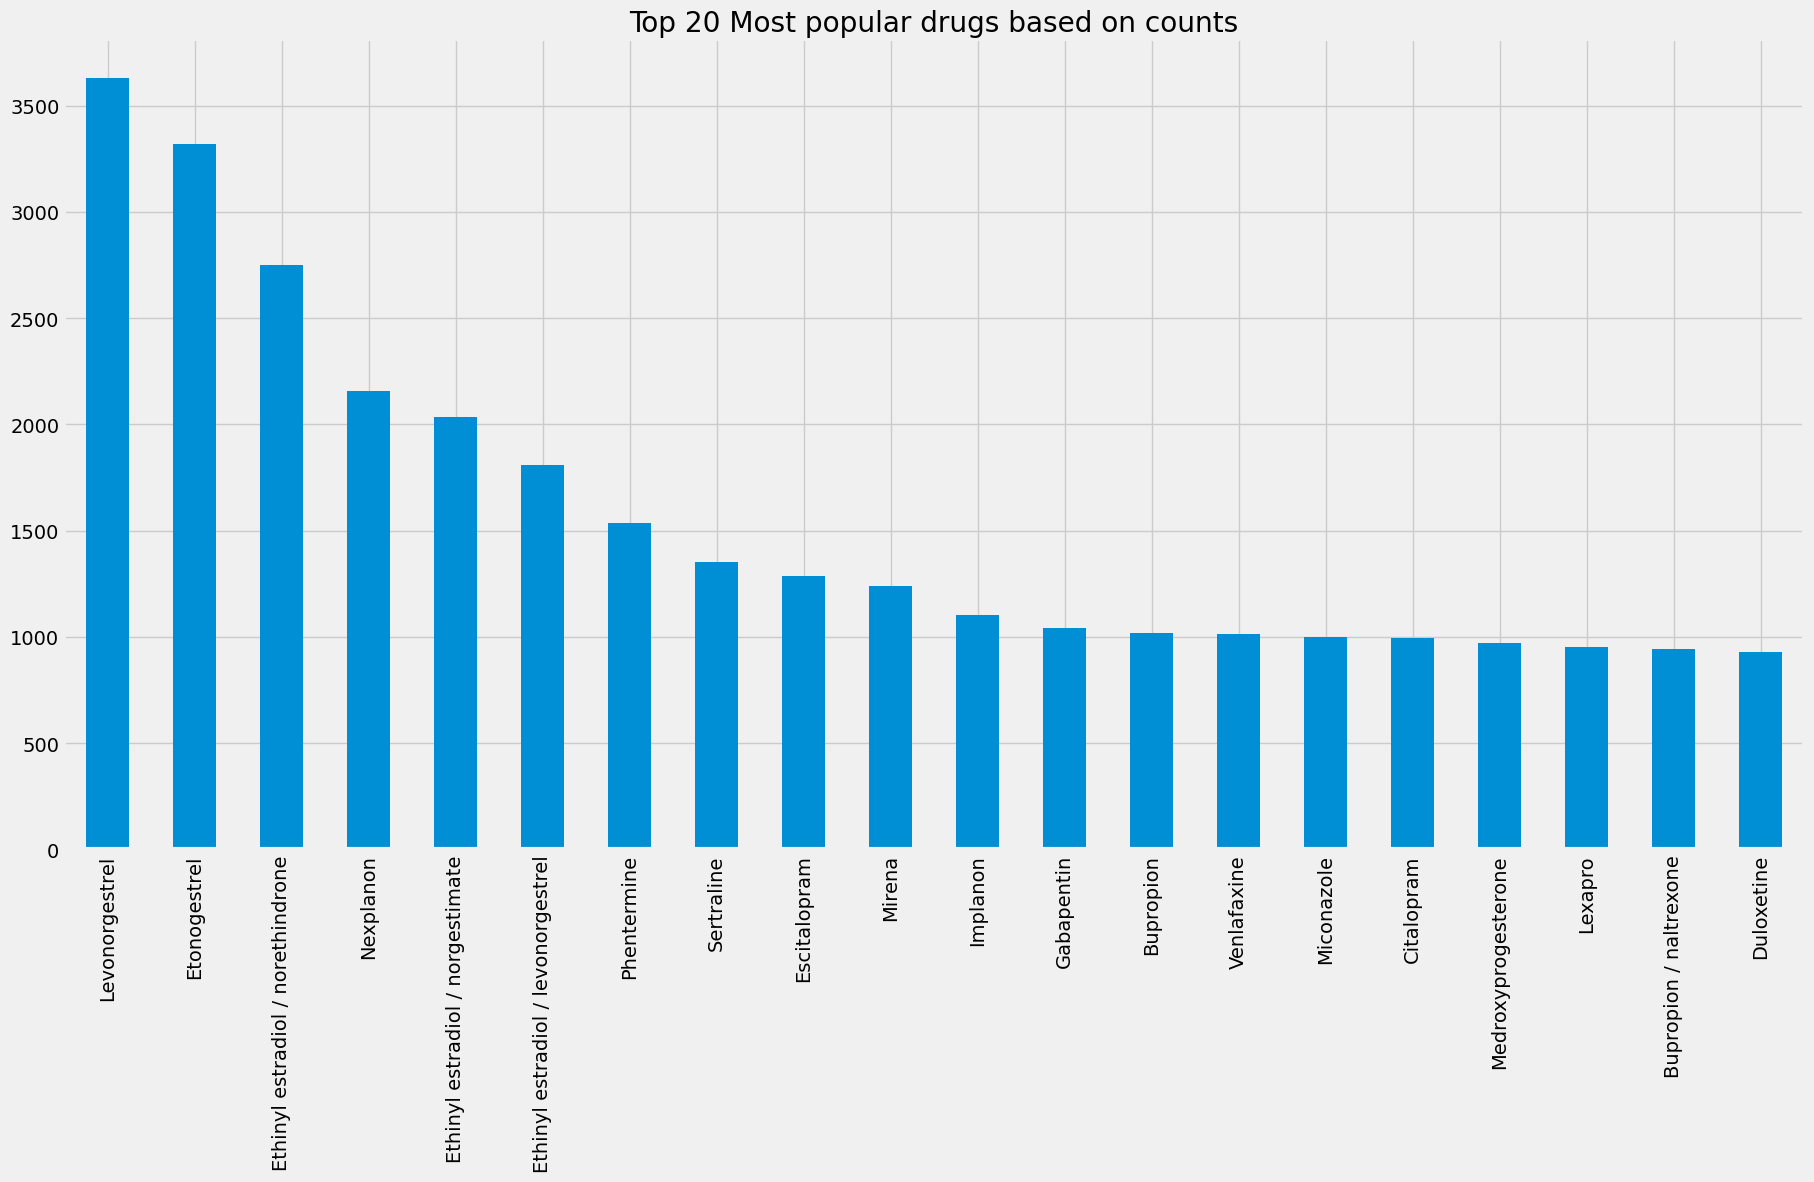

In [22]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")

####Observation

Most of the commonest drugs are hormonal drugs

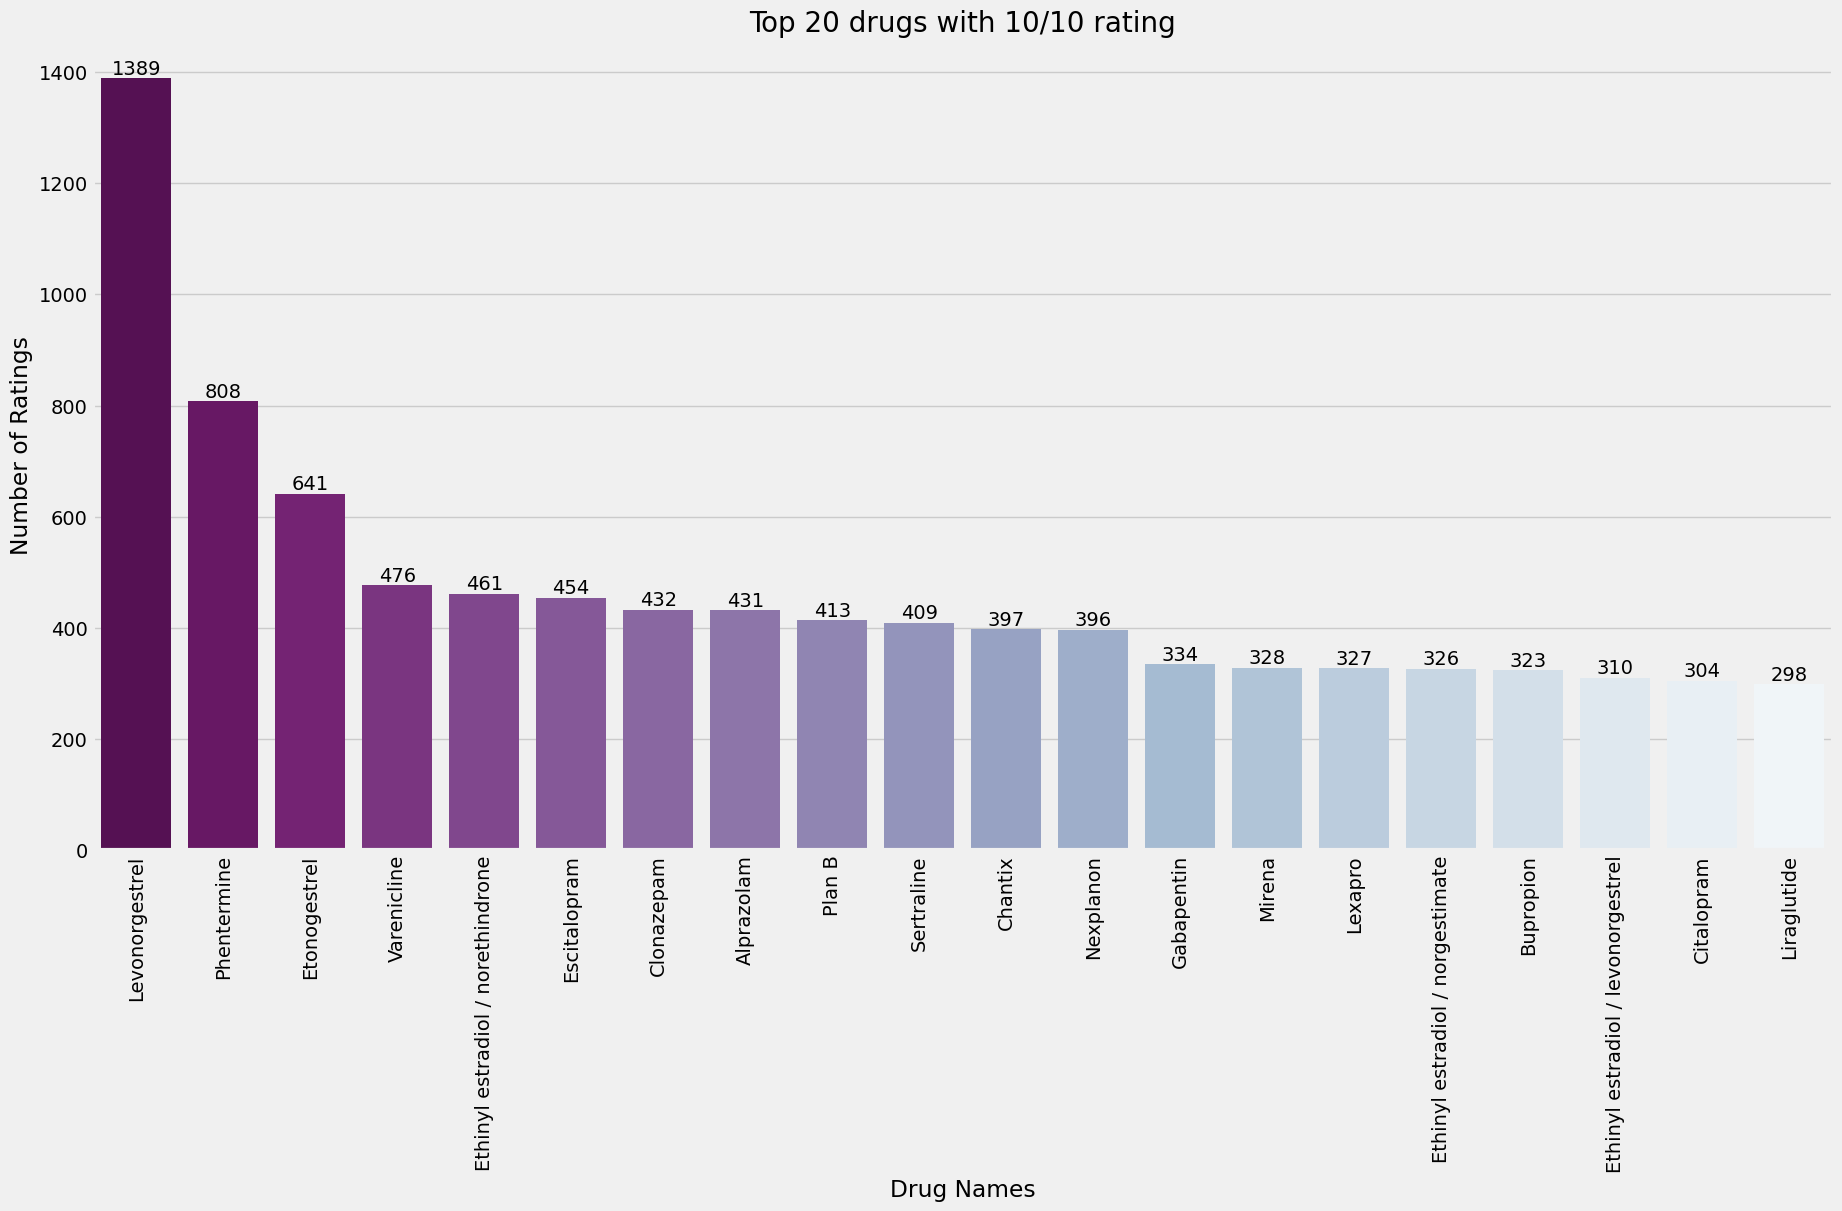

In [23]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

Observation :
    
+Levonorgestrel, Phentemine, Etonogestrel are the Durgs with the Heighest Ratings

In [24]:
#Least 20 drugs (Most Popular)
df['drugName'].value_counts().nsmallest(20)

Benzoyl peroxide / salicylic acid    1
Maxitrol                             1
Uniretic                             1
Co-trimoxazole                       1
Smoothie Readi-Cat 2                 1
Hexachlorophene                      1
Urised                               1
Clarinex-D 12 Hour                   1
Kemadrin                             1
Pancreaze                            1
Acyclovir / hydrocortisone           1
Magnevist                            1
Gengraf                              1
Attapulgite                          1
Colyte                               1
Zyrtec-D                             1
Valganciclovir                       1
Tetrahydrozoline                     1
Femtrace                             1
Marcaine                             1
Name: drugName, dtype: int64

Text(0.5, 1.0, 'Least 20 drugs based on counts')

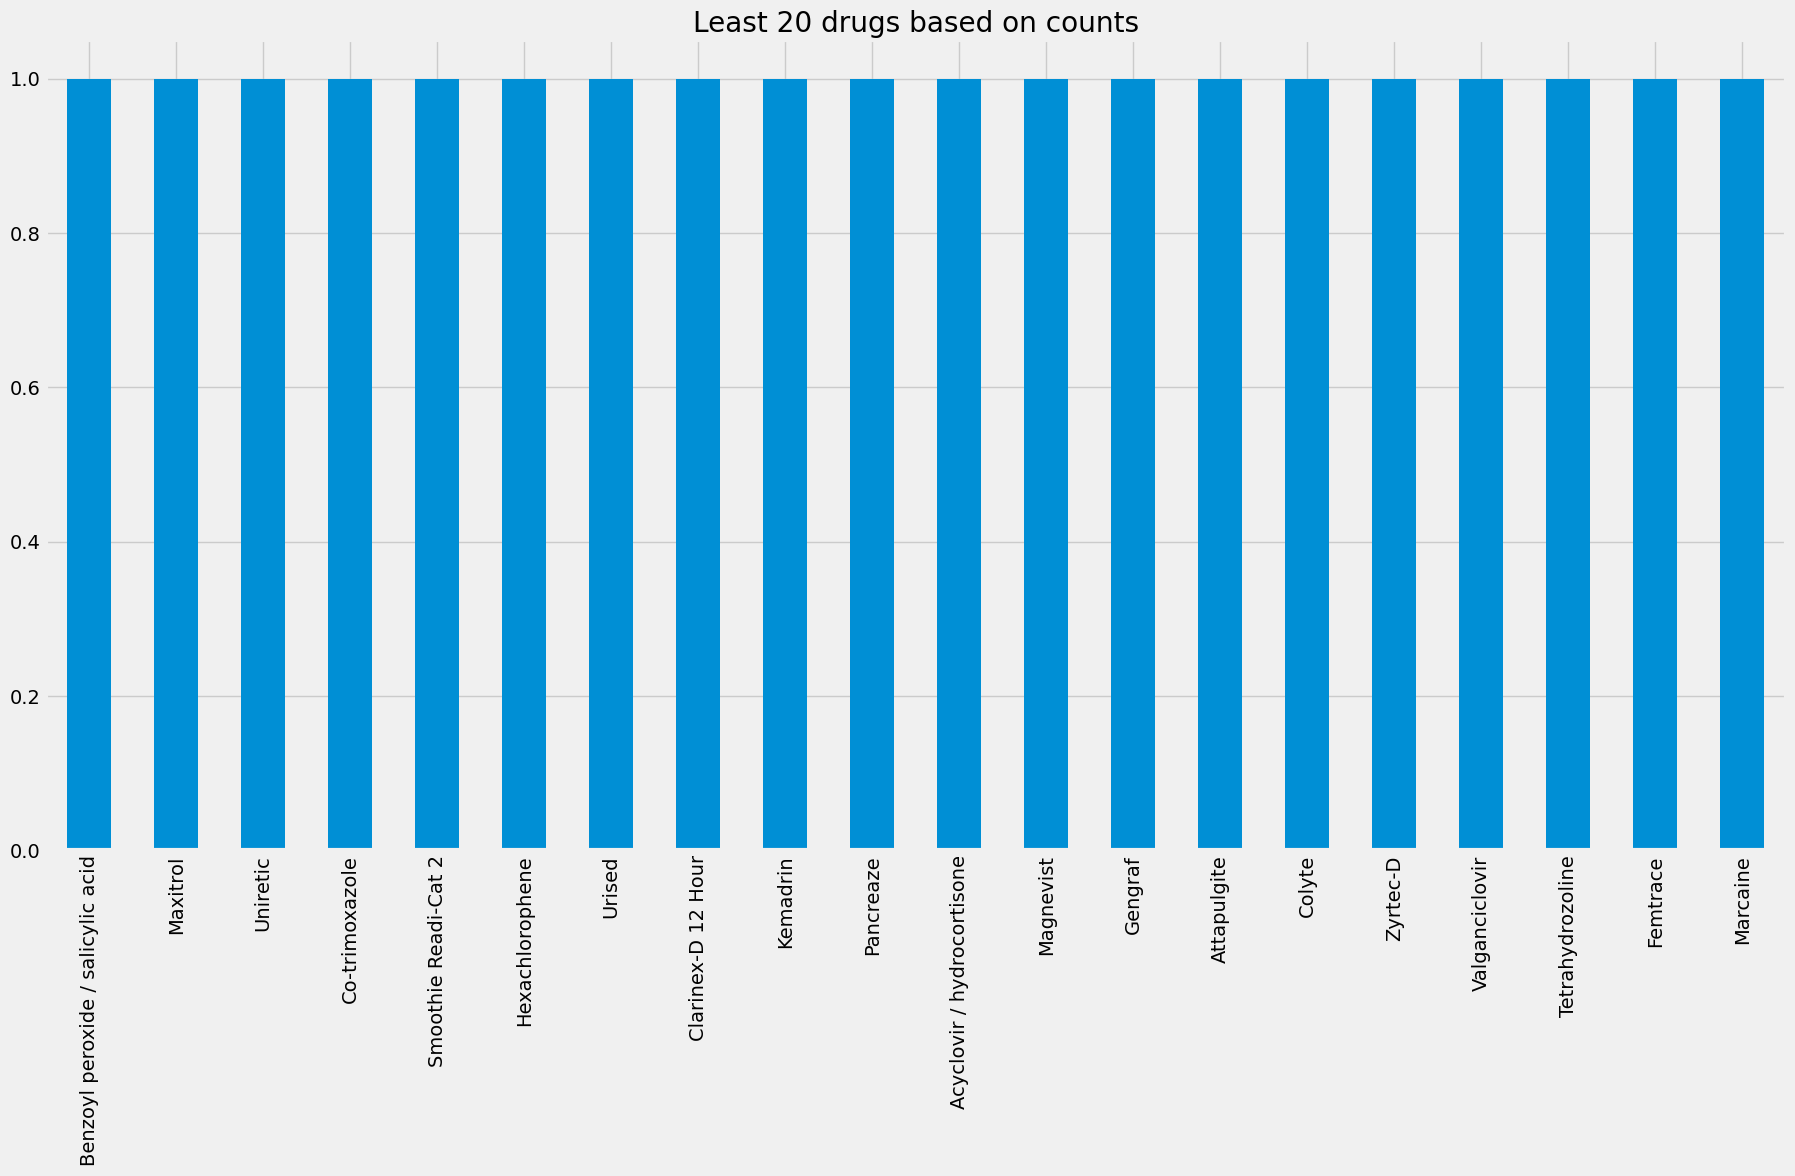

In [25]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')
plt.title("Least 20 drugs based on counts")

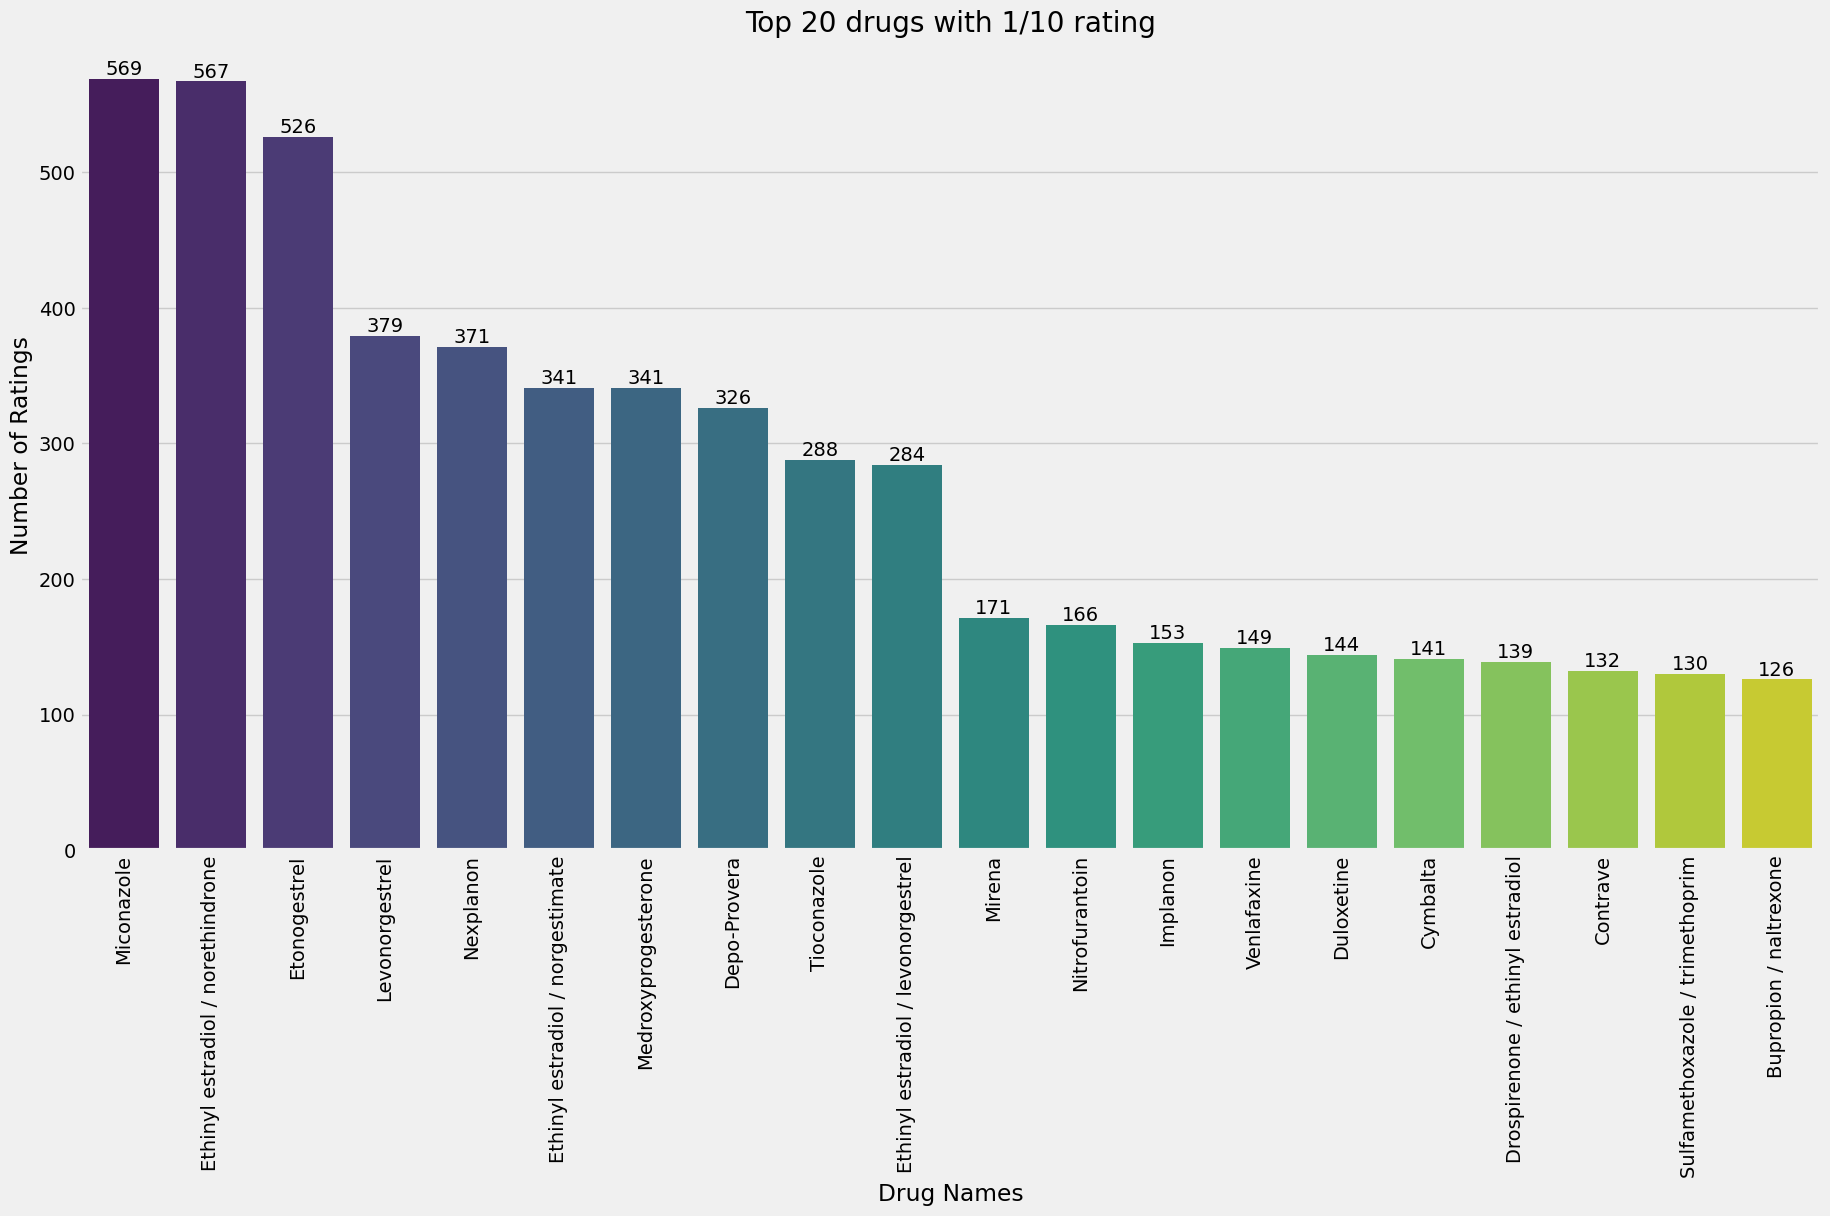

In [26]:
# Least 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()


Observation :
    
+Norethindrone, Miconzole are the Drugs with the Least ratings given by users


####What are the groups/classification of drugs used?

suffix or endings

In [27]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [28]:
def classify_drug(drugName):
    for i in drug_suffix.keys():
        if drugName.endswith(i):
             return drug_suffix[i]

In [29]:
classify_drug('Etonogestrel')

In [30]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [31]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [32]:
# How many Groups of Drugs By Class
df['drug_class'].unique().tolist()

['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [33]:
# How many Groups of Drugs By Class
len(df['drug_class'].unique().tolist())


23

In [34]:
# Which of class of drug  is the most commonest
df['drug_class'].value_counts()

antifungal (except metronidazole)    4190
opiod analgesics                     3907
oral hypoglycemics                   3537
antibiotic                           3394
anti-anxiety                         2625
h2 blockers (anti-ulcers)            1221
beta blockers                         965
corticosteroid (prednisone)           877
antipyschotics (phenothiazine)        660
arb blocker                           556
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      27
barbiturate                            19
anticoagulants                          8
Name: drug_class, dtype: int64

Text(0.5, 1.0, 'Distribution of Drugs By Class')

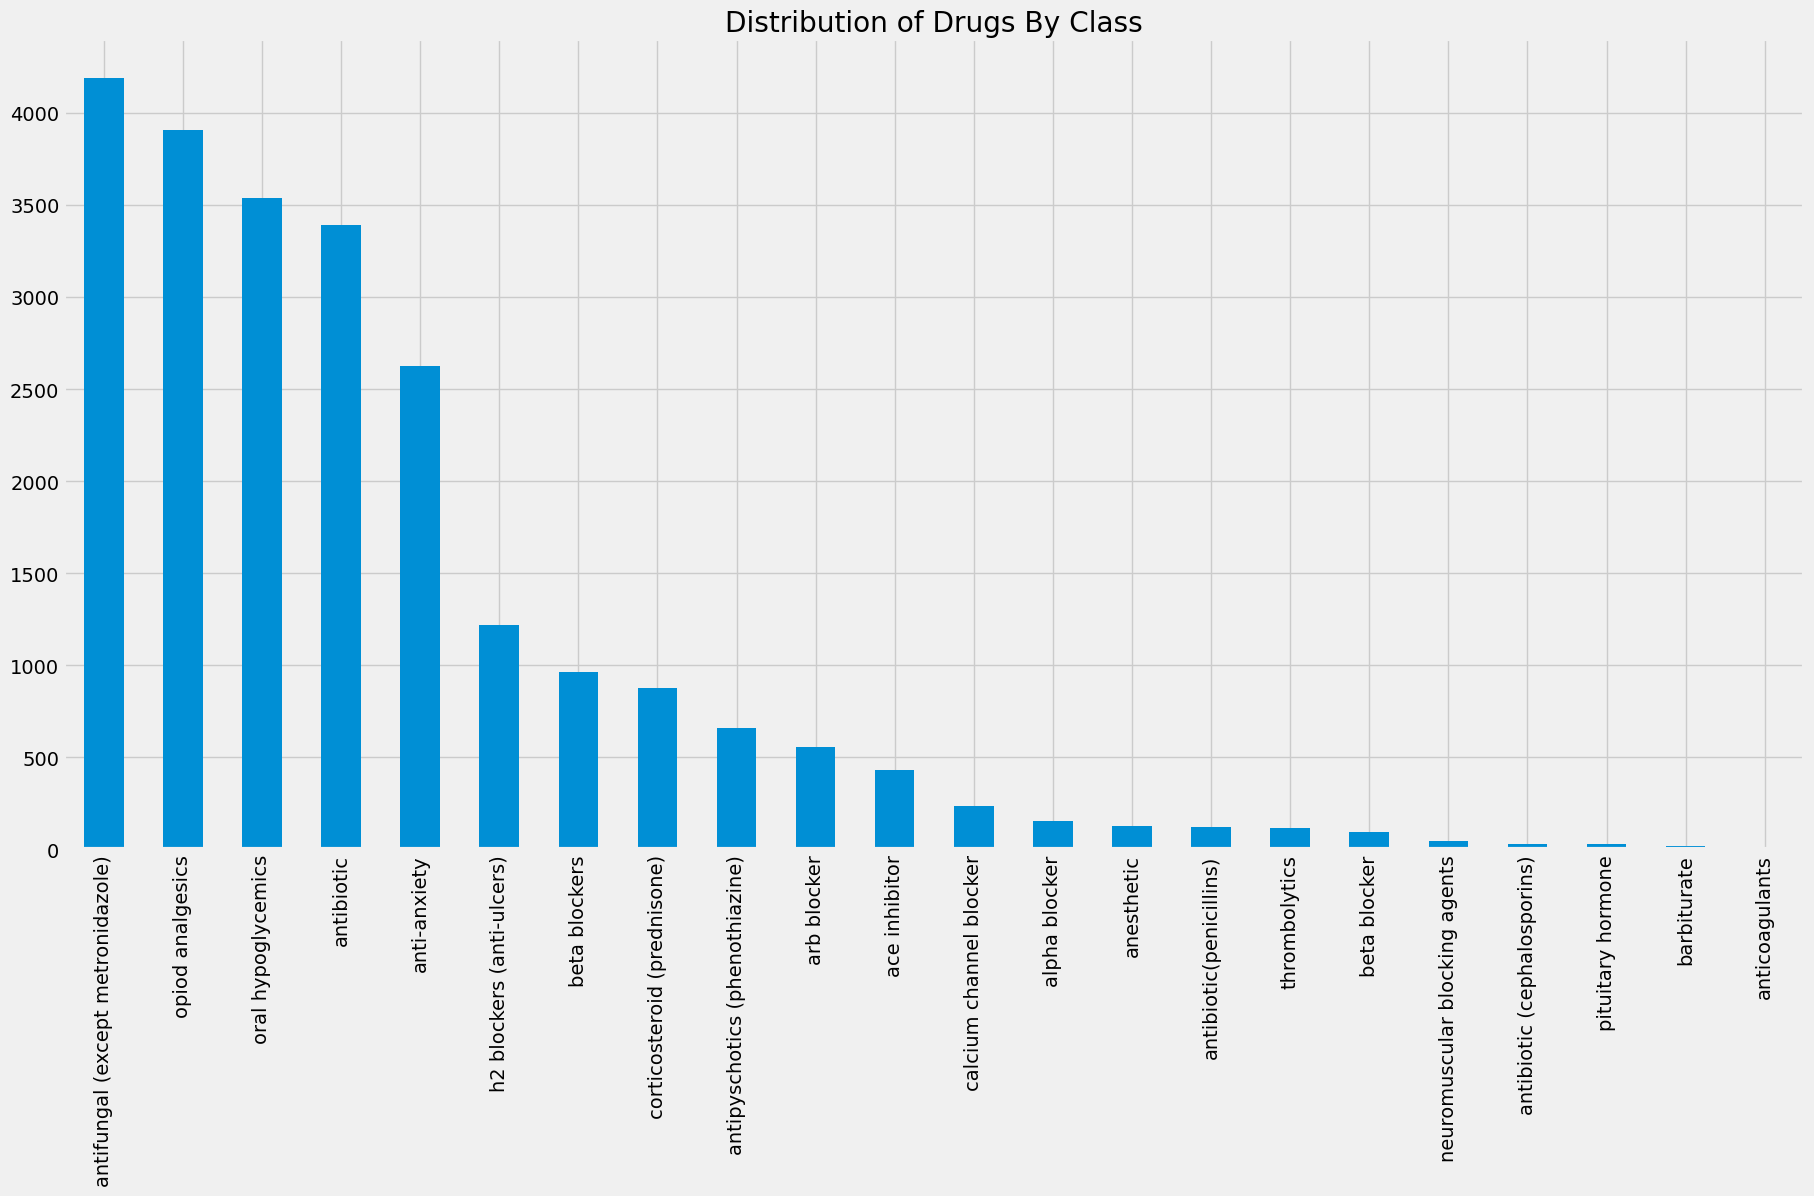

In [35]:
# Which of class of drug  is the most commonest
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs By Class")

##Observartion

   + The Most Commonest Class/group of drugs used is
       -   Oral hypoglycemics(OHAs)-(Diabetes)
       -   angiotension receptor blockers(ARBs)-(To Treat Hypertion)
       -   opiod analgesics -(pain)  

<Figure size 1500x1000 with 0 Axes>

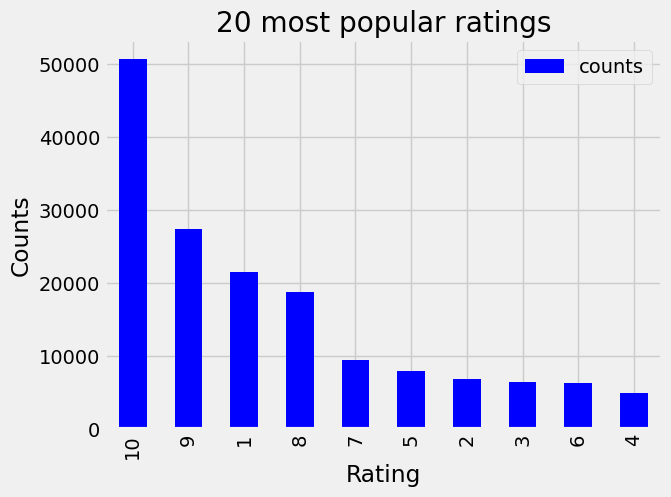

In [36]:
# Grouping the data by rating and count the frequency of each rating
rating_counts = df.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)

# Plot a bar chart of the 20 most popular ratings
plt.figure(figsize=(15,10))
rating_counts[:20].plot.bar(x='rating',y='counts',color='blue')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('20 most popular ratings')
plt.show()

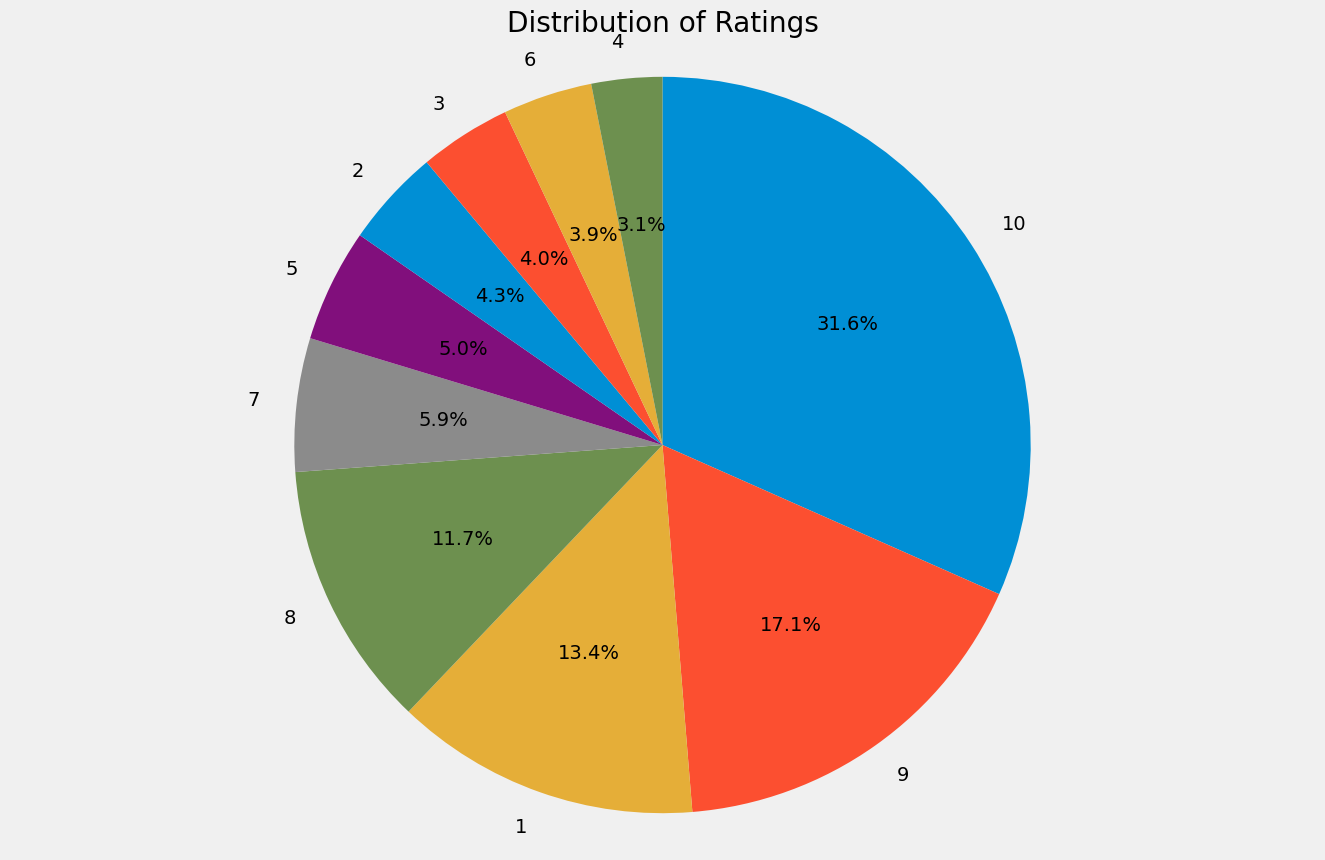

In [37]:
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

In [38]:
df.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [39]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud for Birth Control',fontsize=14)

NameError: name 'df_birth' is not defined

<Figure size 2000x2000 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud for Depression',fontsize=14)

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud for High Blood Pressure',fontsize=14)

DATA PREPROCESSING

In [ ]:
from wordcloud import STOPWORDS
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
df['review'][2]

In [ ]:
#Converting to lower case
df['review1'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review1'].head()

   +  Removing Punctuations:
   +  This step is to remove the punctuations. Because of punctuation, a word might be treated differently than it originally is. 
  

In [ ]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()



In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [ ]:
#Removing Stopwords
df['review1'] = df['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['review1'].head()


In [ ]:
#Remove The Rare words
freq = pd.Series(' '.join(df['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

In [ ]:
#Stemming and Lemmatization
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
df['review1'] = df['review1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
nltk.download('wordnet')

In [ ]:
df['review1'] = df['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['review1'].head()

In [ ]:
df['review1'][2]

In [ ]:
df['review_clean'] = df['review1']

In [ ]:
df.drop(['review1'],axis =1,inplace=True)

In [ ]:
df.head()

In [ ]:
#Creating Features and Target Variable
X_feat=df['review_clean']
y=df['condition']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,test_size=0.2, random_state=0)

In [ ]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
count_train

#Machine LearningModel:Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)


Machine Learning Model : Passive aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('accuracy:  %0.3f' % score)

TFIDF(Term Frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfdif_vectorizer = TfidfVectorizer(stop_words = 'english')
tfdif_vectorizer.fit(X_train)
tfidf_train2 = tfdif_vectorizer.transform(X_train)
tfidf_test2 = tfdif_vectorizer.transform(X_test)


Machine Learning Model :Naive Bayes

In [ ]:
count_train[0][0]

In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train2, y_train)
pred = mnb_tf.predict(tfidf_test2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)


Machine Learning Model TFIDF

In [ ]:
tfdif_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.8)
tfidf_train = tfdif_vectorizer.fit_transform(X_train)
tfidf_test = tfdif_vectorizer.transform(X_test)

In [ ]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

TFIDF:Bigrams

In [ ]:
tfdif_vectorizer2 = TfidfVectorizer(stop_words = 'english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfdif_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfdif_vectorizer.transform(X_test)

In [ ]:
tfidf_train_2.shape

In [ ]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

TFIDF:Trigrams

In [ ]:
tfdif_vectorizer3 = TfidfVectorizer(stop_words = 'english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfdif_vectorizer.fit_transform(X_train)
tfidf_test_3 = tfdif_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

Sample prediction

In [ ]:
df.tail()

In [ ]:
text = ["It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"]
test = tfdif_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1